In [608]:
#Author: Sajid Zaidi
import pandas as pd
from matplotlib import pyplot as plt

In [609]:
# read in data, making sure the date is parsed properly
temp=pd.read_csv("Temperature_Data.csv",parse_dates=[5])
pop=pd.read_csv("Population_Data.csv")

# 0. Data Exploration, Cleaning and Imputation

In [610]:
#Check what data looks like
temp.head()


,name,country_name,country_code,continent,station_code,location_date,temp_mean_c,temp_min_c,temp_max_c
0,Atlanta,UnitedStates,USA,North America,KATL,2021-04-20,17.491667,12.2,23.3
1,Windsor Locks,UnitedStates,USA,North America,KBDL,2021-04-20,13.887500,3.9,22.2
2,Nashville,UnitedStates,USA,North America,KBNA,2021-04-20,15.175000,6.7,23.3
3,Boise,UnitedStates,USA,North America,KBOI,2021-04-20,9.329167,1.7,15.6
4,Boston,UnitedStates,USA,North America,KBOS,2021-04-20,16.716667,10.0,23.9


In [611]:
#check for Cities with more than one station
temp.groupby('name').station_code.unique() 


name
Albany                    [KALB]
Atlanta                   [KATL]
Baltimore                 [KBWI]
Boise                     [KBOI]
Boston                    [KBOS]
Buffalo                   [KBUF]
Burbank                   [KBUR]
Chicago O'Hare            [KORD]
Columbus                  [KCMH]
Covington                 [KCVG]
Dallas                    [KDFW]
Denver                    [KDEN]
Detroit/Wayne             [KDTW]
Fresno                    [KFAT]
Houston                   [KIAH]
Las Vegas                 [KLAS]
Little Rock               [KLIT]
Los Angeles               [KCQT]
Memphis                   [KMEM]
Minneapolis               [KMSP]
NYC/LaGuardia             [KLGA]
Nashville                 [KBNA]
New Orleans               [KMSY]
Philadelphia              [KPHL]
Phoenix/Sky HRBR          [KPHX]
Pittsburgh                [KPIT]
Portland            [KPDX, KPWM]
Raleigh/Durham            [KRDU]
Richmond                  [KRIC]
Sacramento/Execu          [KSAC]
Salt 

In [612]:
len(temp.groupby('name').station_code.unique())

38

Portland oregon and portland maine are both included. Washington DC has two entries. Richmond is Richmond, VA

In [613]:
# First we will add the rows for missing days
# set a multi-index
temp_indexed=temp.set_index(['station_code','location_date'])

In [614]:
temp_indexed

,,name,country_name,country_code,continent,temp_mean_c,temp_min_c,temp_max_c
station_code,location_date,,,,,,,
KATL,2021-04-20,Atlanta,UnitedStates,USA,North America,17.491667,12.2,23.3
KBDL,2021-04-20,Windsor Locks,UnitedStates,USA,North America,13.887500,3.9,22.2
KBNA,2021-04-20,Nashville,UnitedStates,USA,North America,15.175000,6.7,23.3
KBOI,2021-04-20,Boise,UnitedStates,USA,North America,9.329167,1.7,15.6
KBOS,2021-04-20,Boston,UnitedStates,USA,North America,16.716667,10.0,23.9
...,...,...,...,...,...,...,...,...
KSAC,2015-01-01,Sacramento/Execu,UnitedStates,USA,North America,3.500000,-1.7,10.6
KPWM,2015-01-01,Portland,UnitedStates,USA,North America,-3.454167,-7.8,-0.6
KRDU,2015-01-01,Raleigh/Durham,UnitedStates,USA,North America,3.291667,-4.4,10.6


In [615]:
#no missing values right now
temp_indexed.isnull().sum()

name            0
country_name    0
country_code    0
continent       0
temp_mean_c     0
temp_min_c      0
temp_max_c      0
dtype: int64

In [616]:
# we will add rows for missing station-date combinations
# we generate a new multi-index that has every combo of station and date
codes=temp.station_code.unique() 
all_days = pd.date_range(temp.location_date.min(), temp.location_date.max(), freq='D')

In [617]:
new_index=pd.MultiIndex.from_product([ codes,all_days],names=['station_code','date'])


In [618]:
# use reindex function with new index to get rows for missing days by station
temp_indexed=temp_indexed.reindex(new_index)

In [619]:
#voila!
temp_indexed

name  country_name country_code      continent  \
station_code date                                                            
KATL         2015-01-01  Atlanta  UnitedStates          USA  North America   
             2015-01-02  Atlanta  UnitedStates          USA  North America   
             2015-01-03  Atlanta  UnitedStates          USA  North America   
             2015-01-04  Atlanta  UnitedStates          USA  North America   
             2015-01-05  Atlanta  UnitedStates          USA  North America   
...                          ...           ...          ...            ...   
KALB         2021-04-16   Albany  UnitedStates          USA  North America   
             2021-04-17   Albany  UnitedStates          USA  North America   
             2021-04-18   Albany  UnitedStates          USA  North America   
             2021-04-19   Albany  UnitedStates          USA  North America   
             2021-04-20      NaN           NaN          NaN            NaN   

                         temp_mean_c  temp_min_c  temp_max_c  
station_code date                                             
KATL         2015-01-01     6.758333         0.0        13.9  
             2015-01-02     8.116667         6.7         9.4  
             2015-01-03    11.154167         8.9        16.1  
             2015-01-04    14.279167         6.7        17.8  
             2015-01-05     5.045833         1.1         8.9  
...                              ...         ...         ...  
KALB         2021-04-16     2.425000        -0.6         6.7  
             2021-04-17     5.370833         2.2         9.4  
             2021-04-18     8.104167         2.2        15.0  
             2021-04-19     9.025000         2.8        14.4  
             2021-04-20          NaN         NaN         NaN  

[89778 rows x 7 columns]

In [620]:
temp_indexed.isnull().sum()
# 559 missing values generated. We added 559 day-station combinations

name            559
country_name    559
country_code    559
continent       559
temp_mean_c     559
temp_min_c      559
temp_max_c      559
dtype: int64

All cities appear every year, and each city is only missing a couple days per year. We will infer the missing city temperatures by taking the 7 day rolling average


In [621]:
# add a 7 day centered moving average column by station. only 1 nonmissing value is necessary to calculate
temp_indexed['temp_mean_7dma']=temp_indexed.groupby('station_code')['temp_mean_c'].apply(lambda x: x.rolling(window=7,min_periods=1,center=True).mean())

In [622]:
temp_indexed['temp_min_7dma']=temp_indexed.groupby('station_code')['temp_min_c'].apply(lambda x: x.rolling(window=7,min_periods=1,center=True).mean())

In [623]:
temp_indexed['temp_max_7dma']=temp_indexed.groupby('station_code')['temp_max_c'].apply(lambda x: x.rolling(window=7,min_periods=1,center=True).mean())

In [624]:
# If a temperature column is missing, fill it in with the 7 day centered moving average for that station
temp_indexed["imputed"]=temp_indexed["temp_mean_c"].isnull()
temp_indexed["temp_mean_c"]=temp_indexed["temp_mean_c"].fillna(temp_indexed['temp_mean_7dma'])
temp_indexed["temp_min_c"]=temp_indexed["temp_min_c"].fillna(temp_indexed['temp_min_7dma'])
temp_indexed["temp_max_c"]=temp_indexed["temp_max_c"].fillna(temp_indexed['temp_max_7dma'])


In [625]:
#no more null values!
temp_indexed.isnull().sum()

name              559
country_name      559
country_code      559
continent         559
temp_mean_c         0
temp_min_c          0
temp_max_c          0
temp_mean_7dma      0
temp_min_7dma       0
temp_max_7dma       0
imputed             0
dtype: int64

In [626]:
#Now we create a mapping of ICAO station code to City and state
# from googling, Covington is Cincinatti, Windsor Locks is Hartford

icao=[

['KALB','Albany','New York'],
['KATL','Atlanta','Georgia'],
['KBWI','Baltimore','Maryland'],
['KBOI','Boise','Idaho'],
['KBOS','Boston','Massachusetts'],
['KBUF','Buffalo','New York'],
['KBUR','Burbank','California'],
['KORD','Chicago','Illinois'],
['KCMH','Columbus','Ohio'],
['KCVG', 'Cincinnati','Ohio'],
['KDFW','Dallas','Texas'],
['KDEN','Denver','Colorado'],
['KDTW','Detroit','Michigan'],
['KFAT','Fresno','California'],
['KIAH','Houston','Texas'],
['KLAS','Las Vegas','Nevada'],
['KLIT','Little Rock','Arkansas'],
['KCQT','Los Angeles','California'],
['KMEM','Memphis','Tennessee'],
['KMSP','Minneapolis','Minnesota'],
['KLGA','New York','New York'],
['KBNA','Nashville','Tennessee'],
['KMSY','New Orleans','Louisiana'],
['KPHL','Philadelphia','Pennsylvania'],
['KPHX','Phoenix','Arizona'],
['KPIT','Pittsburgh','Pennsylvania'],
['KPDX','Portland','Oregon'],
['KPWM','Portland','Maine'],
['KRDU','Raleigh','North Carolina'],
['KRIC','Richmond','Virginia'],
['KSAC','Sacramento','California'],
['KSLC','Salt Lake City','Utah'],
['KSFO','San Francisco','California'],
['KSEA','Seattle','Washington'],
['KGEG','Spokane','Washington'],
['KSTL','St. Louis','Missouri'],
['KIAD','Washington','District of Columbia'],
['KDCA','Washington','District of Columbia'],
['KBDL','Hartford','Connecticut']
]

icao_mappings=pd.DataFrame(icao, columns = ['ICAO', 'City','State'])







In [627]:
#Check if all station codes have a population match
cities=pd.DataFrame(temp.station_code.unique(),columns=["code"]) 



In [628]:
cities.merge(icao_mappings,how='left',left_on='code',right_on='ICAO').merge(pop,how='left',on=['City','State'])

,code,ICAO,City,State,population,Lon,Lat
0,KATL,KATL,Atlanta,Georgia,432427.0,-84.4227,33.7629
1,KBDL,KBDL,Hartford,Connecticut,124867.0,-72.6833,41.7660
2,KBNA,KBNA,Nashville,Tennessee,609644.0,-86.7850,36.1718
3,KBOI,KBOI,Boise,Idaho,210145.0,-116.2311,43.5985
4,KBOS,KBOS,Boston,Massachusetts,625087.0,-71.0202,42.3320
5,KBUF,KBUF,Buffalo,New York,261025.0,-78.8597,42.8925
6,KBUR,KBUR,Burbank,California,104092.0,-118.3249,34.1890
7,KBWI,KBWI,Baltimore,Maryland,619493.0,-76.6105,39.3002
8,KCMH,KCMH,Columbus,Ohio,797434.0,-82.9850,39.9848
9,KCQT,KCQT,Los Angeles,California,3819702.0,-118.4108,34.0194



We'll have to add in albany and portland me manually as they're missing

In [629]:
# info from wikipedia
albany=pd.DataFrame([['Albany','New York',96460,-73.756233,42.652580]],columns=['City','State','population','Lon','Lat'])
portland=pd.DataFrame([['Portland','Maine',66595,-70.2568,43.6591]],columns=['City','State','population','Lon','Lat'])

In [630]:
albany

,City,State,population,Lon,Lat
0,Albany,New York,96460,-73.756233,42.65258


In [631]:
portland

,City,State,population,Lon,Lat
0,Portland,Maine,66595,-70.2568,43.6591


In [632]:
pop=pop.append(albany)
pop=pop.append(portland)

In [633]:
# merge on the population data to main dataset
my_index=temp_indexed.index
temp_cleaned=temp_indexed.merge(icao_mappings,how='left',left_on='station_code',right_on='ICAO').merge(pop,how='left',on=['City','State']).set_index(my_index)

In [634]:
temp_cleaned=temp_cleaned.drop(['name','country_name','country_code','continent','temp_mean_7dma','temp_min_7dma','temp_max_7dma'],axis=1)

In [635]:
#create a new weights variable that will be population, except For Washington DC it will be population divided by 2
def f(x):
    if x['City'] == 'Washington':
        return x['population']/2
    else: 
        return x['population']

temp_cleaned['weights'] = temp_cleaned.apply(f, axis=1)    

In [636]:
temp_cleaned

temp_mean_c  temp_min_c  temp_max_c  imputed  ICAO  \
station_code date                                                             
KATL         2015-01-01     6.758333         0.0   13.900000    False  KATL   
             2015-01-02     8.116667         6.7    9.400000    False  KATL   
             2015-01-03    11.154167         8.9   16.100000    False  KATL   
             2015-01-04    14.279167         6.7   17.800000    False  KATL   
             2015-01-05     5.045833         1.1    8.900000    False  KATL   
...                              ...         ...         ...      ...   ...   
KALB         2021-04-16     2.425000        -0.6    6.700000    False  KALB   
             2021-04-17     5.370833         2.2    9.400000    False  KALB   
             2021-04-18     8.104167         2.2   15.000000    False  KALB   
             2021-04-19     9.025000         2.8   14.400000    False  KALB   
             2021-04-20     7.500000         2.4   12.933333     True  KALB   

                            City     State  population        Lon       Lat  \
station_code date                                                             
KATL         2015-01-01  Atlanta   Georgia      432427 -84.422700  33.76290   
             2015-01-02  Atlanta   Georgia      432427 -84.422700  33.76290   
             2015-01-03  Atlanta   Georgia      432427 -84.422700  33.76290   
             2015-01-04  Atlanta   Georgia      432427 -84.422700  33.76290   
             2015-01-05  Atlanta   Georgia      432427 -84.422700  33.76290   
...                          ...       ...         ...        ...       ...   
KALB         2021-04-16   Albany  New York       96460 -73.756233  42.65258   
             2021-04-17   Albany  New York       96460 -73.756233  42.65258   
             2021-04-18   Albany  New York       96460 -73.756233  42.65258   
             2021-04-19   Albany  New York       96460 -73.756233  42.65258   
             2021-04-20   Albany  New York       96460 -73.756233  42.65258   

                          weights  
station_code date                  
KATL         2015-01-01  432427.0  
             2015-01-02  432427.0  
             2015-01-03  432427.0  
             2015-01-04  432427.0  
             2015-01-05  432427.0  
...                           ...  
KALB         2021-04-16   96460.0  
             2021-04-17   96460.0  
             2021-04-18   96460.0  
             2021-04-19   96460.0  
             2021-04-20   96460.0  

[89778 rows x 11 columns]

## Overall Cleaning Steps

1. I added rows for each missing station - day combination. This resulted in adding 559 rows.

2. I imputed temperature values for these missing rows by using the 7 day centered moving average for that station. I checked that that there were no missing values after this.

2. I added population data for Albany, NY and Portland, ME to the population dataset as they were missing

3. I created a mapping from ICAO station code to city and state, then used this to merge the temperature data with population data. There were two Portlands (Oregon and Maine), and Richmond refers to richmond, virginia. Covington maps to Cincinnati and Windsor Locks refers to Hartford. The mapping I created solves all these issues

4. I create a weights variable that is equal to population, except for Washington DC we divide by 2 because we have two stations for Washington

At this point, we have our original temperature data merged on to the population data and we have imputed rows for the days that were missing. The dataset is temp_cleaned. 

# 1. Part 1

Since we have already imputed data for the missing station-days, all we have to do is calculate the population-weighted average temperature

In [637]:
# We create 3 series, one for mean, min and max temps respectively
us_popweighted_mean_temp=temp_cleaned.groupby("date").apply(lambda dfx: (dfx["temp_mean_c"] * dfx["weights"]).sum() / dfx["weights"].sum())

In [638]:
us_popweighted_min_temp=temp_cleaned.groupby("date").apply(lambda dfx: (dfx["temp_min_c"] * dfx["weights"]).sum() / dfx["weights"].sum())

In [639]:
us_popweighted_max_temp=temp_cleaned.groupby("date").apply(lambda dfx: (dfx["temp_max_c"] * dfx["weights"]).sum() / dfx["weights"].sum())

In [640]:
# write mean temps to csv
us_popweighted_mean_temp.to_csv('US_PopWeighted_MeanTemps.csv')

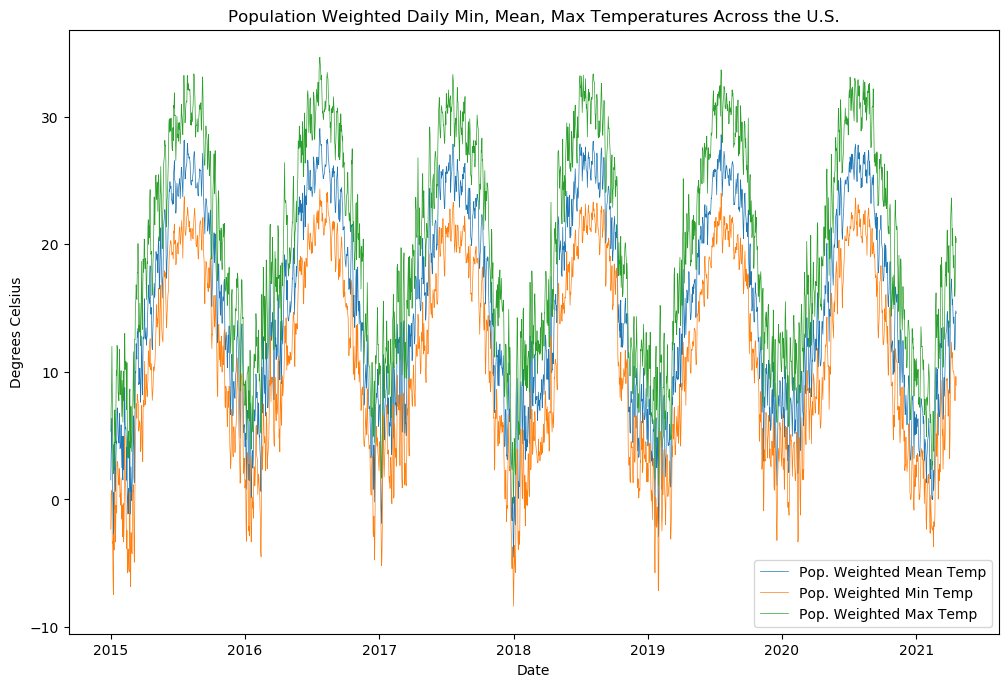

In [641]:

  
# plot the series
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(us_popweighted_mean_temp, label = "Pop. Weighted Mean Temp",linewidth=0.5)
plt.plot(us_popweighted_min_temp, label = "Pop. Weighted Min Temp",linewidth=0.5)
plt.plot(us_popweighted_max_temp, label = "Pop. Weighted Max Temp",linewidth=0.5)
plt.ylabel("Degrees Celsius")
plt.xlabel("Date")
plt.title("Population Weighted Daily Min, Mean, Max Temperatures Across the U.S.")
plt.legend()
plt.show()

# 2. Part 2

 For part 2, we will only use the population weighted mean temperature series from above

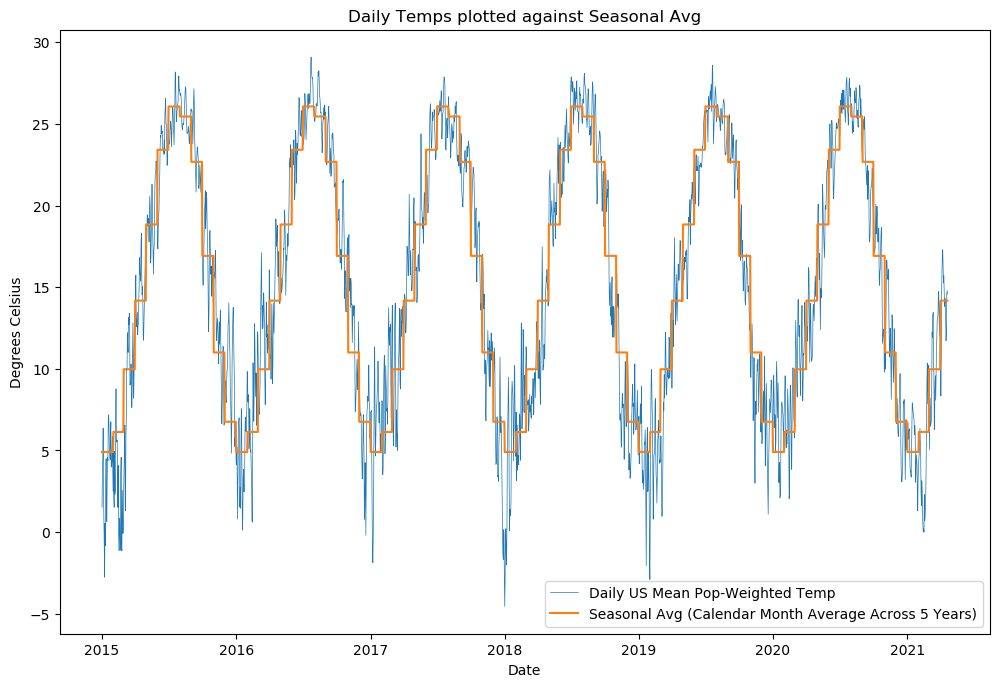

In [642]:
# seasonal avg, high and low cases
# we'll define seasonal avg as the average for that calendar month across all 5 years
df=pd.DataFrame(us_popweighted_mean_temp.reset_index())
df['month_of_year']=df['date'].dt.month
df.columns=['date','temp','month_of_year']
x=df.groupby('month_of_year')['temp'].agg(['mean','min','max'])
df=df.join(x,on='month_of_year')

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(df['date'],df['temp'], label = "Daily US Mean Pop-Weighted Temp",linewidth=0.5)
plt.plot(df['date'],df['mean'], label = "Seasonal Avg (Calendar Month Average Across 5 Years)")
#plt.plot(df['date'],df['min'], label = "Seasonal Low (Calendar Month Low Across 5 Years)",linewidth=0.5)
#plt.plot(df['date'],df['max'], label = "Seasonal Avg (Calendar Month High Across 5 Years)",linewidth=0.5)

plt.ylabel("Degrees Celsius")
plt.xlabel("Date")
plt.title("Daily Temps plotted against Seasonal Avg")
plt.legend()
plt.show()

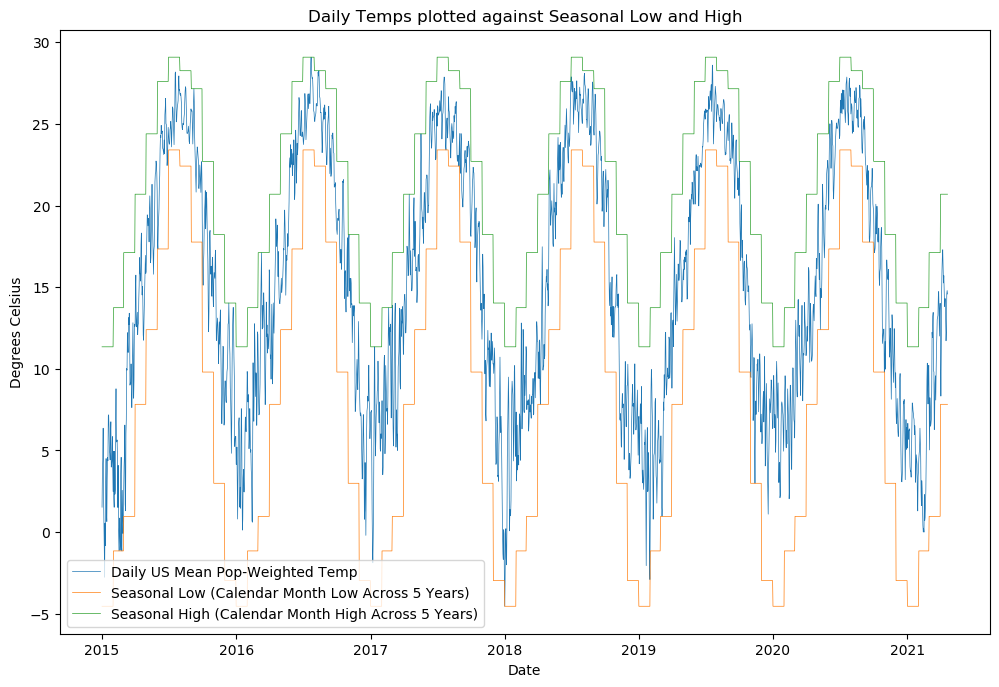

In [647]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(df['date'],df['temp'], label = "Daily US Mean Pop-Weighted Temp",linewidth=0.5)
plt.plot(df['date'],df['min'], label = "Seasonal Low (Calendar Month Low Across 5 Years)",linewidth=0.5)
plt.plot(df['date'],df['max'], label = "Seasonal High (Calendar Month High Across 5 Years)",linewidth=0.5)

plt.ylabel("Degrees Celsius")
plt.xlabel("Date")
plt.title("Daily Temps plotted against Seasonal Low and High")
plt.legend()
plt.show()

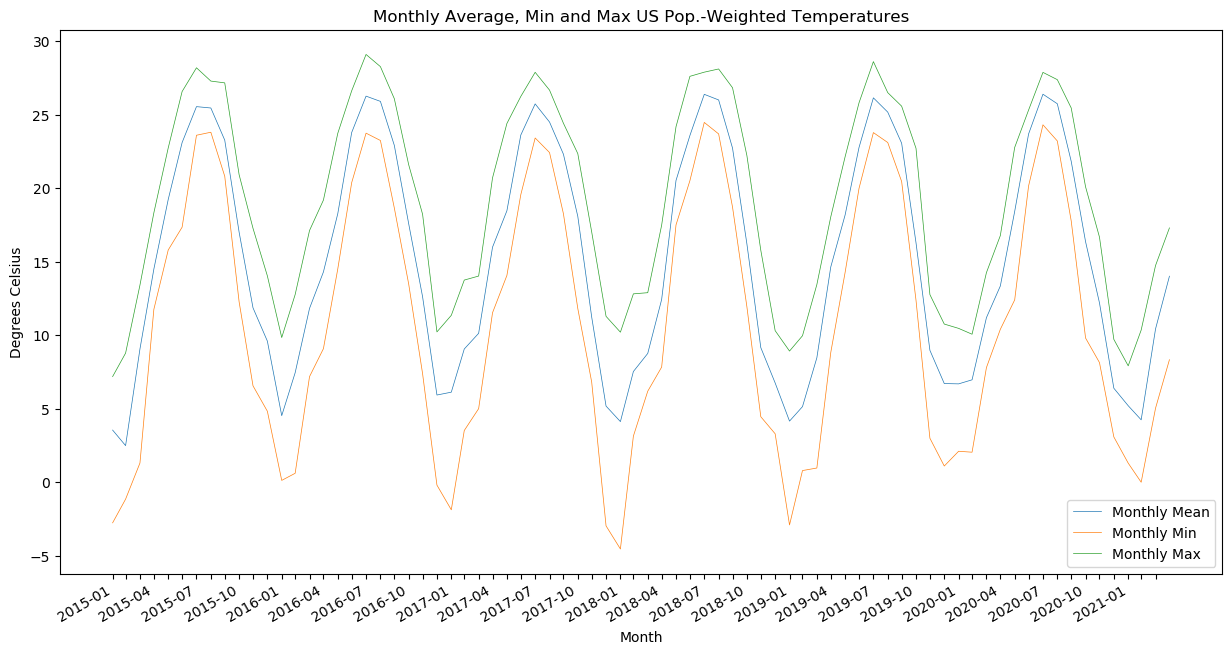

In [644]:
# monthly avg min and max of the series
from matplotlib.dates import DateFormatter
fig, ax = plt.subplots(figsize=(15,8),dpi=100)
#fig=plt.figure(, dpi= 100, facecolor='w', edgecolor='k')

ax.plot(us_popweighted_mean_temp.groupby(pd.Grouper(freq='M')).mean(), label = "Monthly Mean",linewidth=0.5)
ax.plot(us_popweighted_mean_temp.groupby(pd.Grouper(freq='M')).min(), label = "Monthly Min",linewidth=0.5)
ax.plot(us_popweighted_mean_temp.groupby(pd.Grouper(freq='M')).max(), label = "Monthly Max",linewidth=0.5)


myFmt = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(myFmt)
plt.xticks(pd.date_range(temp.location_date.min(), temp.location_date.max(), freq='M'))
n = 3  # Keeps every 3rd label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]
plt.ylabel("Degrees Celsius")
plt.xlabel("Month")
plt.legend()
plt.title("Monthly Average, Min and Max US Pop.-Weighted Temperatures")

## Rotate date labels automatically
fig.autofmt_xdate()
plt.show()







In [645]:
# what data was imputed (missing)?
imputed_data=temp_cleaned[temp_cleaned["imputed"]]

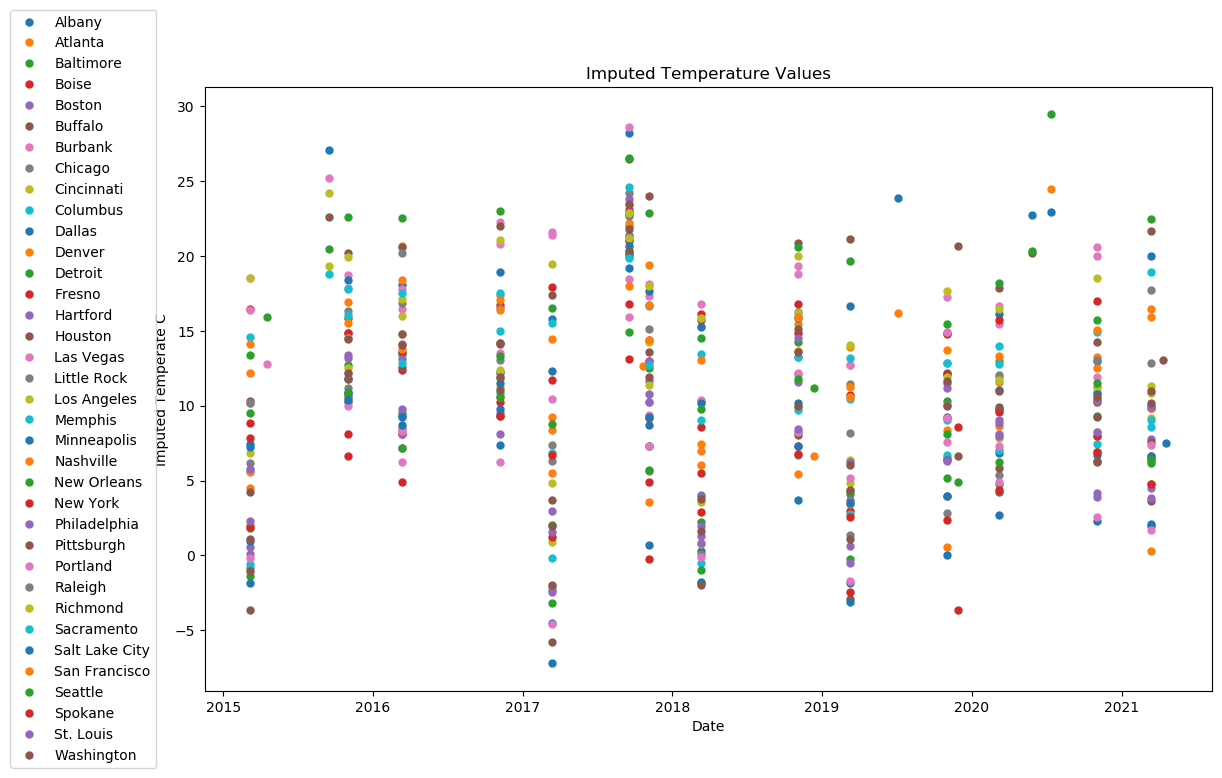

In [646]:
groups = imputed_data.reset_index().groupby('City')

# Plot
fig, ax = plt.subplots(figsize=(13,8),dpi=100)
ax.margins(0.05) 
for name, group in groups:
    ax.plot(group.date, group.temp_mean_c, marker='o', linestyle='', ms=5, label=name)
ax.legend(loc='center left', bbox_to_anchor=(-.2, 0.5))
plt.ylabel("Imputed Temperate C")
plt.xlabel("Date")
plt.title("Imputed Temperature Values")

plt.show()

We can see from the above that there are certain days where we are missing data for almost all cities, and that is when we had to impute a value from the moving average